<a href="https://colab.research.google.com/github/7386300936/Predictive-Vigilance-AI-and-ML-Methods-for-DDoS-Attack-Detection-and-Forecasting/blob/main/Predictive_DDoS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix
from itertools import cycle

In [3]:
# Set up environment
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [5]:
# Change directory and load dataset
#os.chdir('C:\\Users\\DELL\\Downloads')
df = pd.read_csv("/content/ddos_dataset.csv")

# Display initial data
print(df.head(5))
print("Shape of dataset:", df.shape)
print(df.info())
print(df.describe())

    Destination Port   Flow Duration   Total Fwd Packets  \
0                 53             159                   2   
1                 53           51673                   2   
2               7496              43                   1   
3              46564              61                   1   
4                 80              69                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        2                           68   
1                        2                           90   
2                        1                            0   
3                        1                            6   
4                        0                            0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                           266                      34   
1                           166                      45   
2                             6                       0   
3                             6                 

In [6]:
# Function for initial exploratory data analysis (EDA)
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions: %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values: %d " % (total_na))
        print("%38s %10s %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        for i in range(len(df.columns)):
            print("%38s %10s %10s %10s" % (df.columns[i], df.dtypes[i], df.nunique()[i], df.isna().sum()[i]))
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))
initial_eda(df)


Dimensions: 25191 rows, 79 columns
Total NA Values: 6 
                           Column Name  Data Type  #Distinct  NA Values
                      Destination Port      int64       4713          0
                         Flow Duration      int64      15229          0
                     Total Fwd Packets      int64        169          0
                Total Backward Packets      int64        200          0
           Total Length of Fwd Packets      int64       2361          0
           Total Length of Bwd Packets      int64       3517          0
                 Fwd Packet Length Max      int64       1333          0
                 Fwd Packet Length Min      int64        123          0
                Fwd Packet Length Mean    float64       3959          0
                 Fwd Packet Length Std    float64       5037          0
                 Bwd Packet Length Max      int64       1352          0
                 Bwd Packet Length Min      int64        309          0
         

In [7]:
# Display unique values and counts of the target label
print(df["Label"].value_counts())
print(df["Label"].unique())

Label
BENIGN    22744
ATTACK     2447
Name: count, dtype: int64
['BENIGN' 'ATTACK']


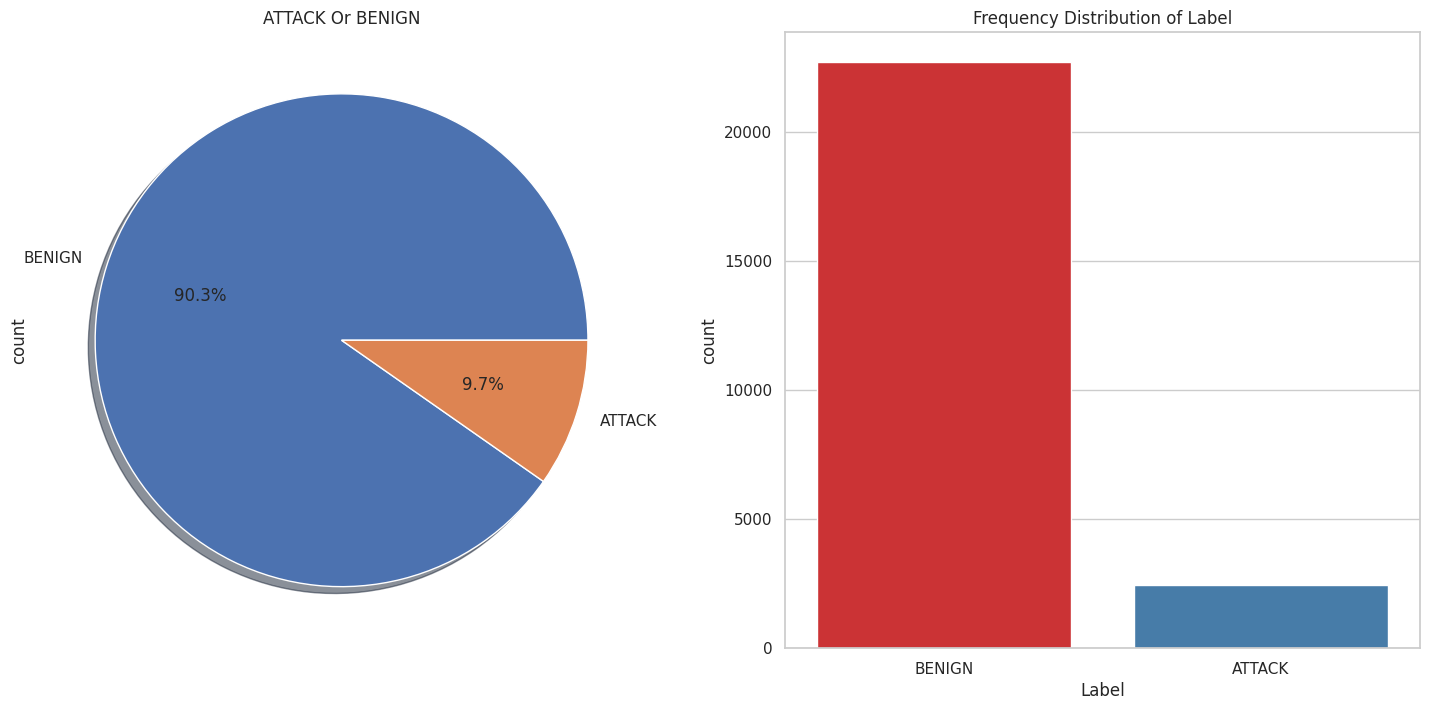

In [8]:
# Visualize frequency distribution of Label
f, ax = plt.subplots(1, 2, figsize=(18, 8))
ax[0] = df['Label'].value_counts().plot.pie(explode=[0, 0], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('ATTACK Or BENIGN')
ax[1] = sns.countplot(x="Label", data=df, palette="Set1")
ax[1].set_title("Frequency Distribution of Label")
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric
for column in df.select_dtypes(include=['object']).columns:
    df[column] = LabelEncoder().fit_transform(df[column])


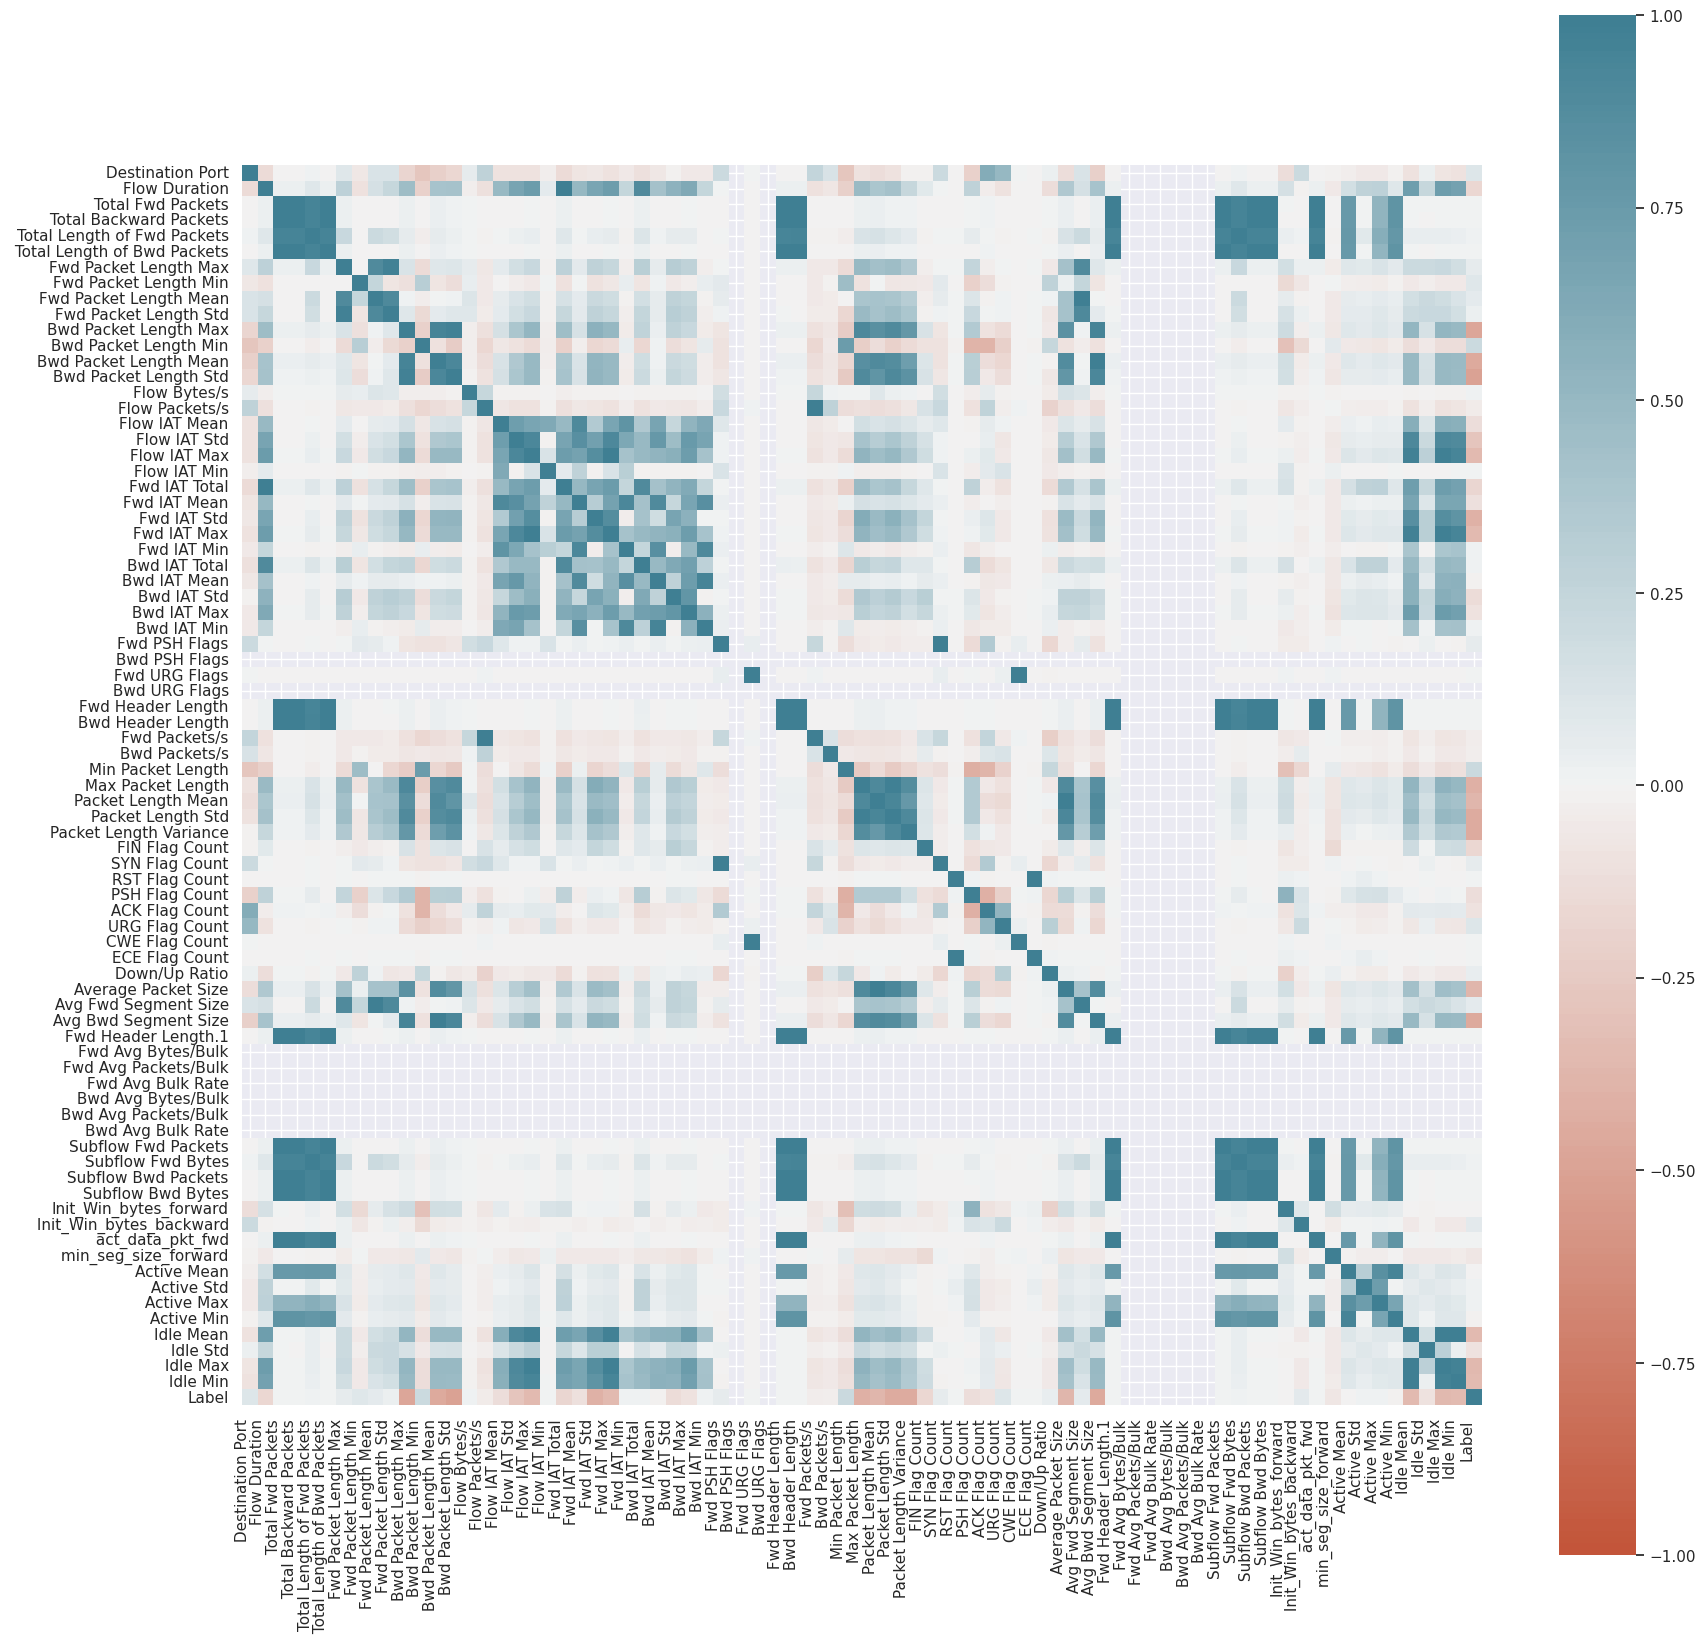

In [12]:
# Compute correlation matrix
corr = df.corr()

# Plot heatmap
sns.set(rc={'figure.figsize': (20, 20)})
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()


In [13]:
# Encode labels and handle missing values
encoder = LabelEncoder()
df["Label"] = encoder.fit_transform(df["Label"])
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [14]:
# Split features and target
X = df.drop(['Label'], axis=1)
y = df['Label']

In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Set up environment
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# Change directory and load dataset
#os.chdir('C:\\Users\\DELL\\Downloads')
df = pd.read_csv("ddos_dataset.csv")

# Convert categorical columns to numeric if necessary
encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = encoder.fit_transform(df[column])

# Replace inf values with NaN and drop rows with NaN values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Split features and target
X = df.drop(['Label'], axis=1)
y = df['Label']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

# Feature importance
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Filter features based on importance threshold
features = feature_scores[feature_scores >= 0.035].index
df_filtered = X[features]

# Split the filtered dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_filtered, y, test_size=0.3, random_state=0)

# Proceed with model training and evaluation using the filtered dataset
# Train Random Forest Classifier with filtered features
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Print accuracy score and classification report
from sklearn.metrics import accuracy_score, classification_report
print('Model accuracy score with selected features: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))


Model accuracy score with selected features: 0.9864
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       704
           1       0.99      1.00      0.99      6850

    accuracy                           0.99      7554
   macro avg       0.99      0.93      0.96      7554
weighted avg       0.99      0.99      0.99      7554



In [19]:
# Split filtered dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_filtered, y, test_size=0.3, random_state=0)

In [20]:
# Train and evaluate Random Forest Classifier with selected features
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Model accuracy score with selected features: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Model accuracy score with selected features: 0.9864
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       704
           1       0.99      1.00      0.99      6850

    accuracy                           0.99      7554
   macro avg       0.99      0.93      0.96      7554
weighted avg       0.99      0.99      0.99      7554



In [21]:
# Train and evaluate Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

In [22]:
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')


Logistic Regression Metrics:
Accuracy: 0.9416
F1 Score: 0.9687
Precision: 0.9413
Recall: 0.9978


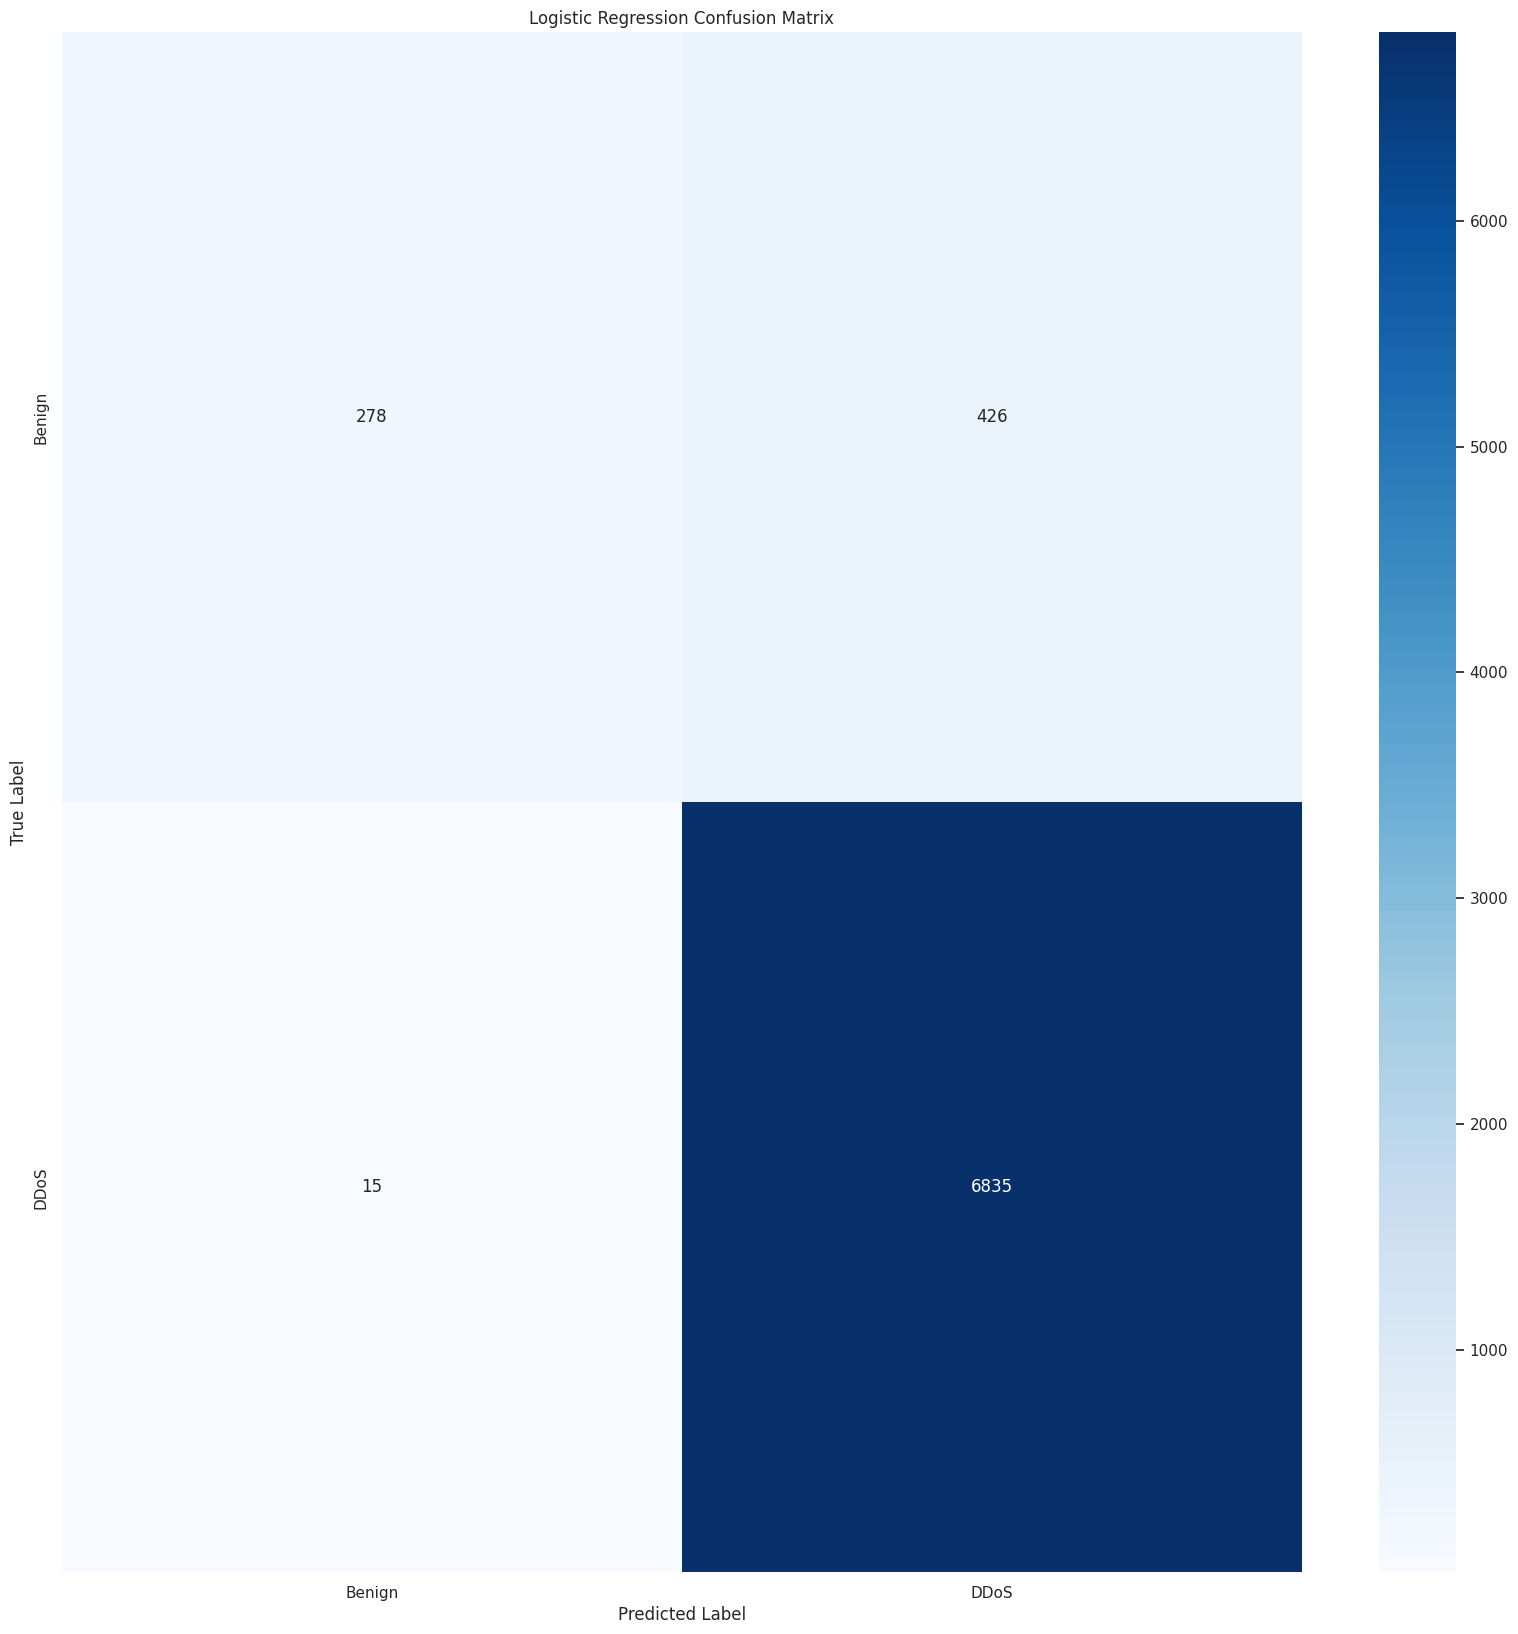

In [23]:
# Confusion Matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, lr_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'DDoS'], yticklabels=['Benign', 'DDoS'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [24]:
# Train and evaluate Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

In [25]:
print('\nNeural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')


Neural Network Metrics:
Accuracy: 0.9321
F1 Score: 0.9631
Precision: 0.9491
Recall: 0.9775


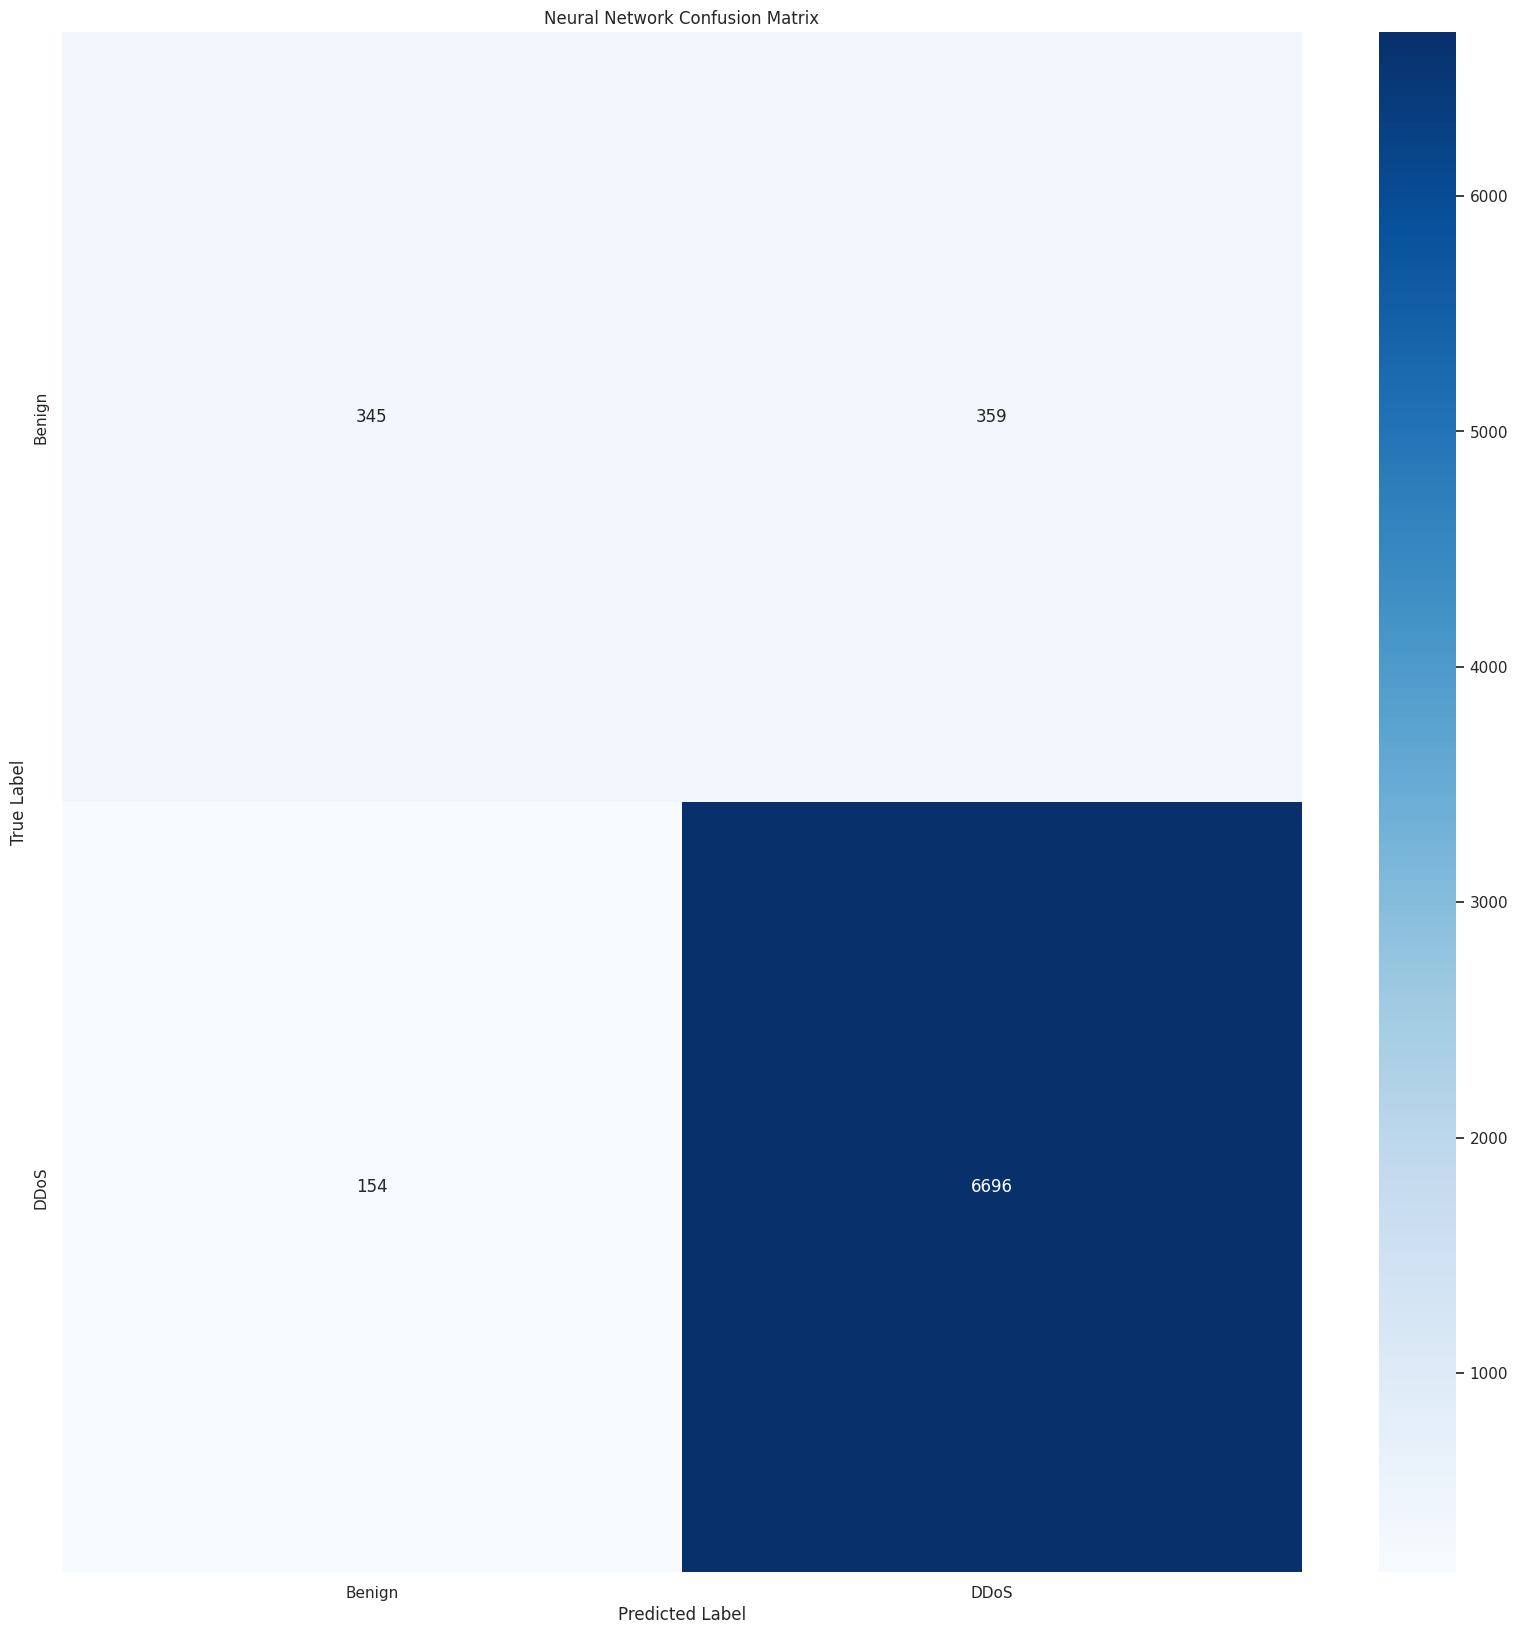

In [26]:
# Confusion Matrix for Neural Network
conf_matrix = confusion_matrix(y_test, nn_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'DDoS'], yticklabels=['Benign', 'DDoS'])
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [27]:
# ROC Curve
y_test_flat = y_test.ravel()  # Flatten the y_test array if it's a 2D array

In [28]:
# Random Forest ROC
rf_proba = clf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test_flat, rf_proba)
rf_auc = auc(rf_fpr, rf_tpr)

In [29]:
# Logistic Regression ROC
lr_proba = lr_model.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test_flat, lr_proba)
lr_auc = auc(lr_fpr, lr_tpr)

In [30]:
# Neural Network ROC
nn_proba = nn_model.predict_proba(X_test)[:, 1]
nn_fpr, nn_tpr, _ = roc_curve(y_test_flat, nn_proba)
nn_auc = auc(nn_fpr, nn_tpr)

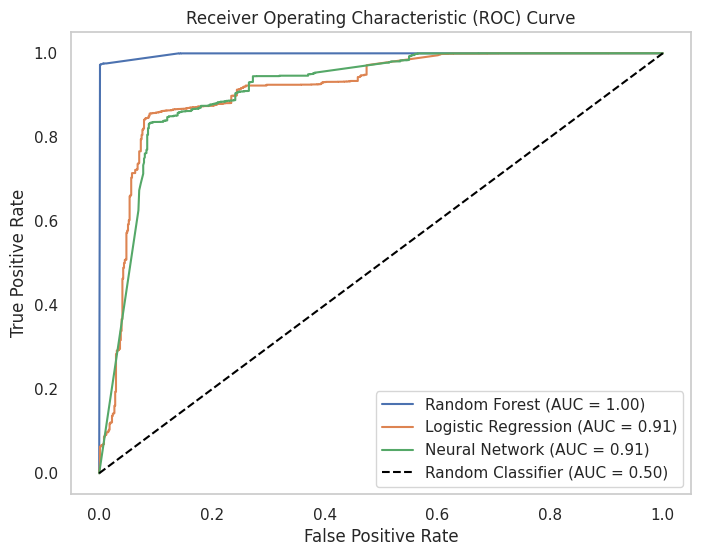

In [31]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()